In [1]:
import os
import sys
sys.path.append("..")
import pickle

from dataset_dataloader import ImageDataset
from arguments import prepare_parser
from vae_model.vae import VaeModel
from utils import load_checkpoint_model_for_eval
from analysis import get_n_data_samples_x_y, build_prior_analysis_grid

import torch

%matplotlib inline
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

# Load relevant checkpoints

In [2]:
checkpoint_dir = "../run_files/checkpoints"
checkpoint_dict = dict()

for i, c in enumerate(os.listdir(checkpoint_dir)):
    print(i, c)
    checkpoint_dict[i] = c

0 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) basic_mlp_decoder - 2021-09-22-11:07:15.pt
1 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) basic_deconv_decoder - 2021-09-22-11:07:15.pt
2 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) conditional_made_decoder - 2021-09-22-11:11:15.pt
3 q(z|x) basic_mlp_encoder - conditional_gaussian_made | p(x|z) basic_mlp_decoder - 2021-09-22-11:31:20.pt
4 q(z|x) basic_mlp_encoder - conditional_gaussian_made | p(x|z) basic_deconv_decoder - 2021-09-22-11:48:20.pt
5 q(z|x) basic_mlp_encoder - independent_gaussian | p(x|z) basic_mlp_decoder - 2021-09-22-11:50:42.pt
6 q(z|x) basic_conv_encoder - independent_gaussian | p(x|z) basic_mlp_decoder - 2021-09-22-11:50:42.pt
7 q(z|x) basic_conv_encoder - independent_gaussian | p(x|z) conditional_made_decoder - 2021-09-22-11:50:42.pt
8 q(z|x) basic_conv_encoder - independent_gaussian | p(x|z) basic_deconv_decoder - 2021-09-22-11:50:42.pt
9 q(z|x) basic_mlp_encoder -

# Plot some data samples

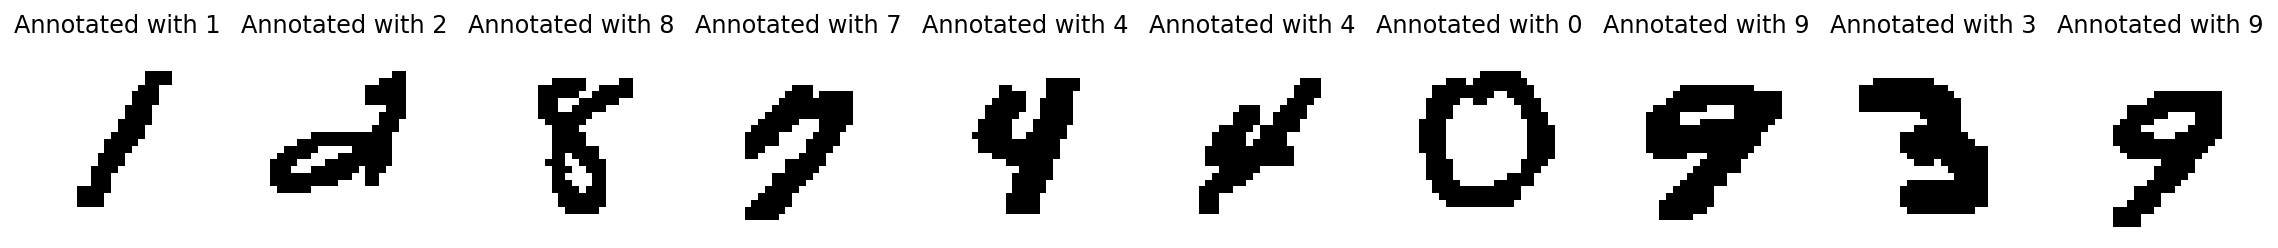

In [3]:
n_samples = 10
data_X, data_y = get_n_data_samples_x_y(image_dataset_name="bmnist", N_samples=n_samples)

fig, axs = plt.subplots(ncols=n_samples, figsize=(2*n_samples, 2))
for i in range(n_samples):
    axs[i].imshow(data_X[i, 0, :, :], cmap='Greys')
    axs[i].set_title(f"Annotated with {data_y[i]}")
    axs[i].axis('off')

/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


best val loss 83.31


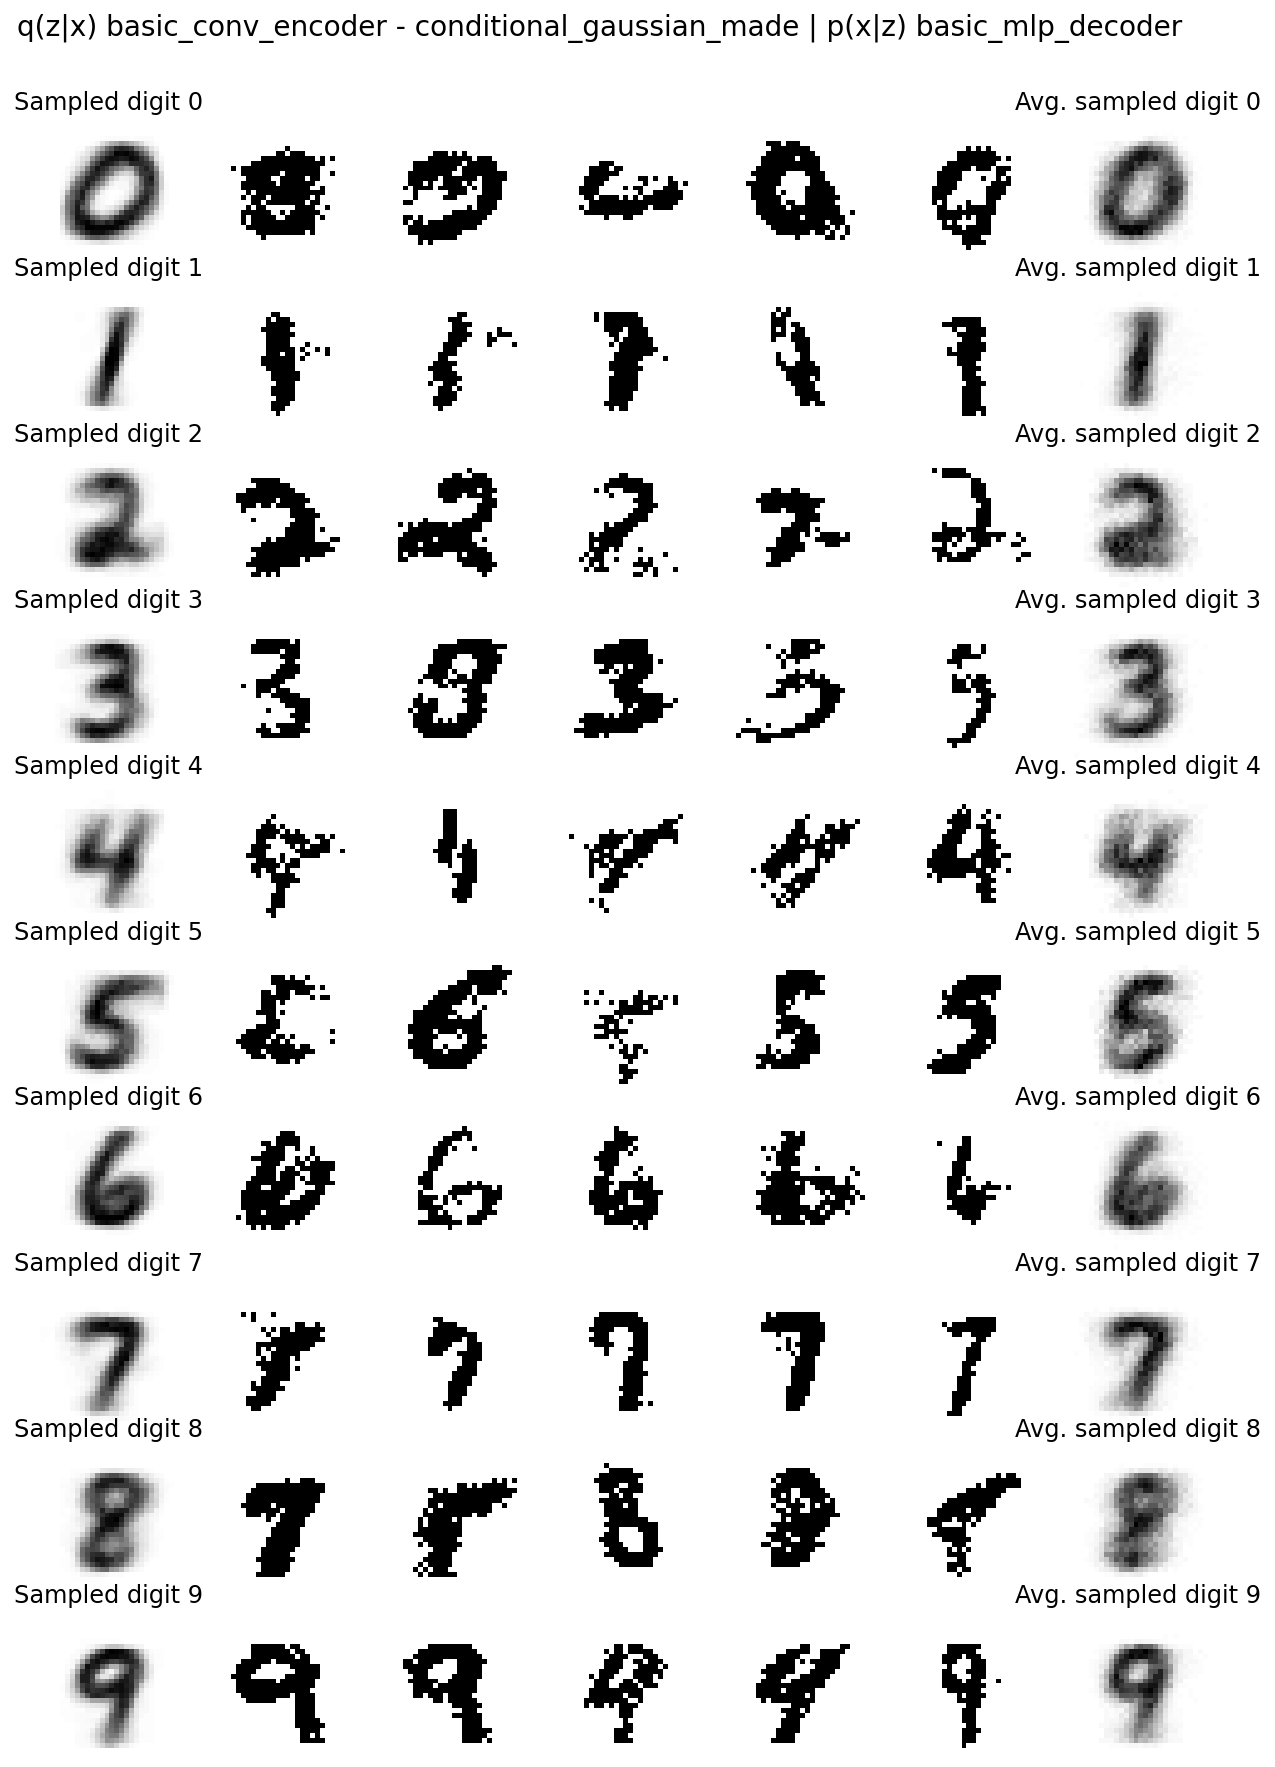

best val loss 83.29


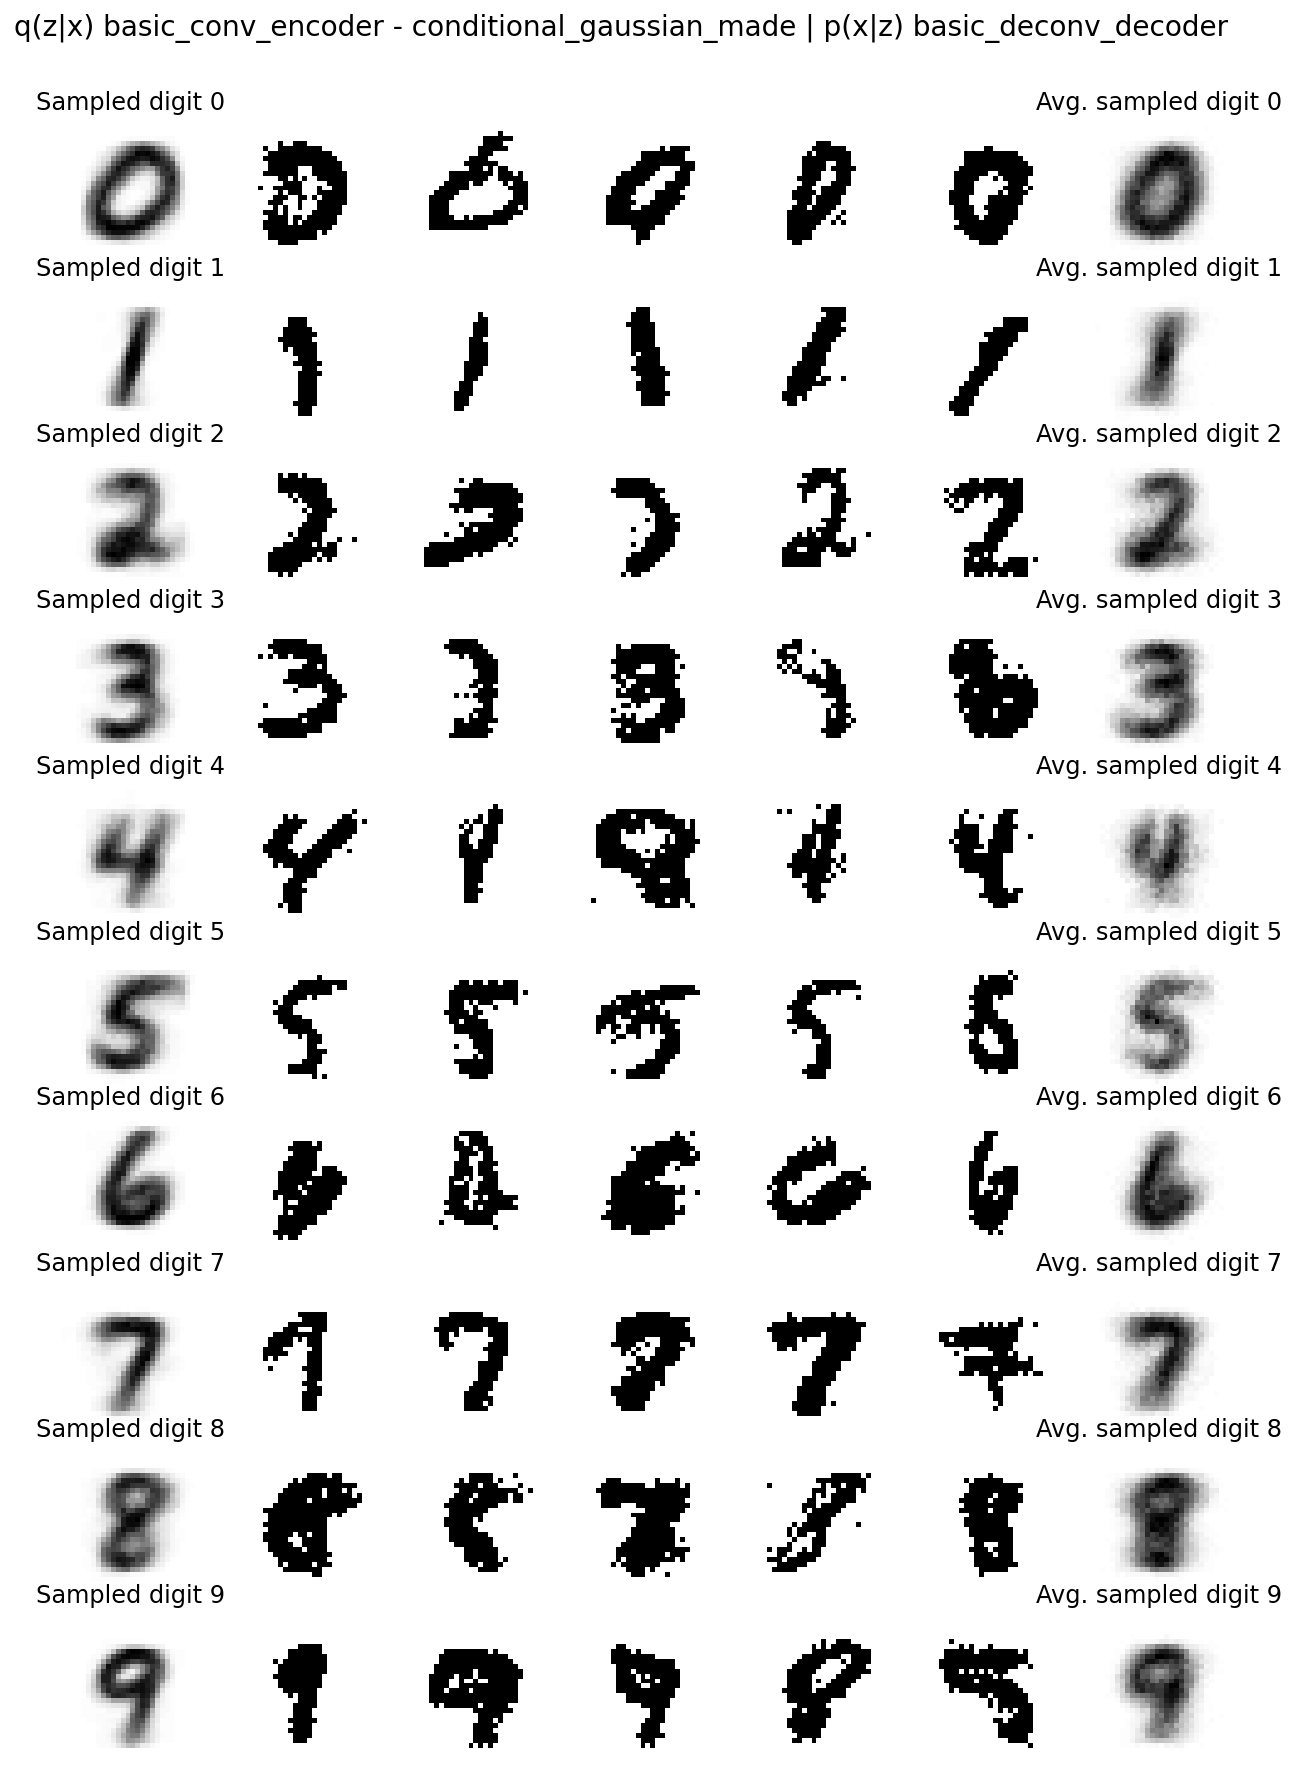

best val loss 83.44


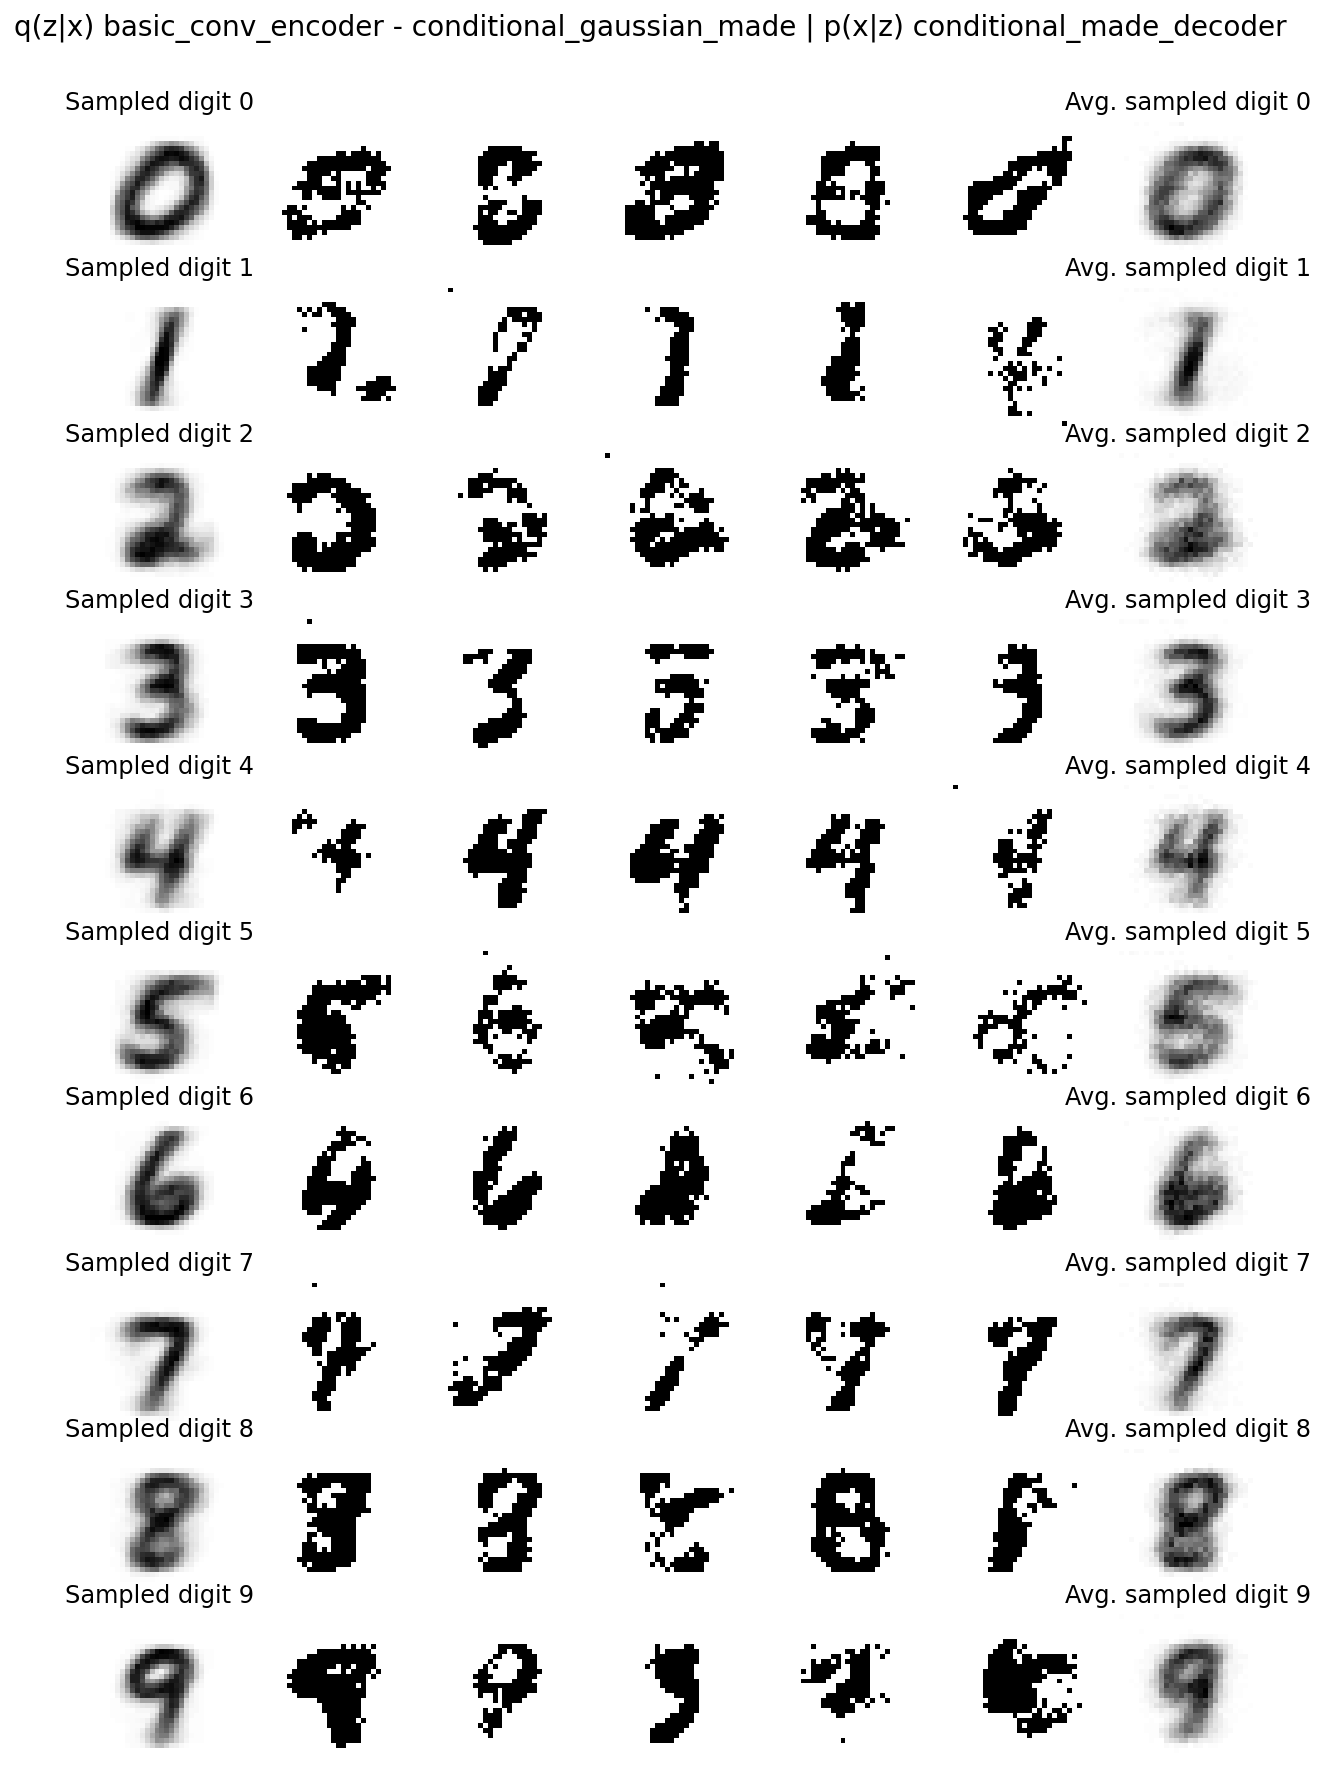

best val loss 87.91


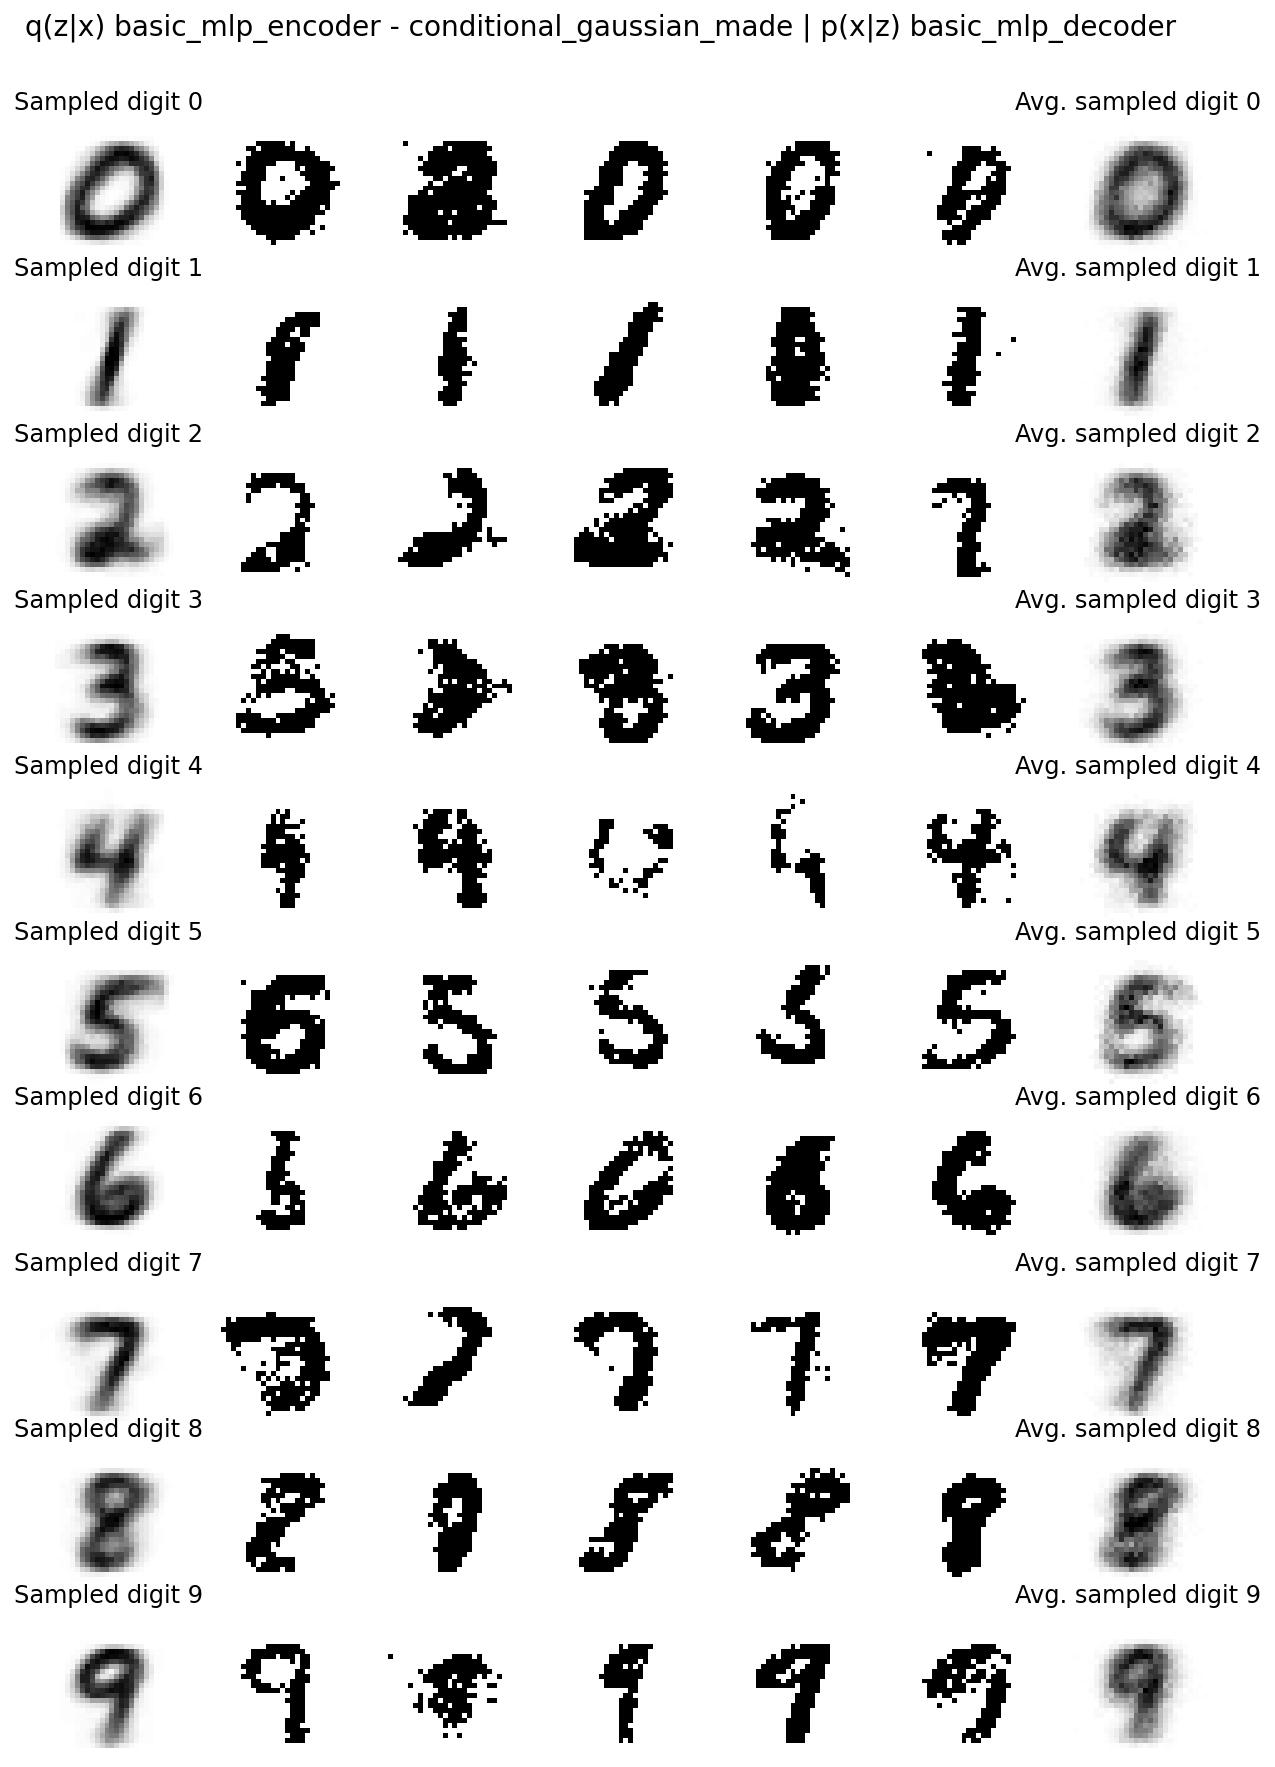

best val loss 90.53


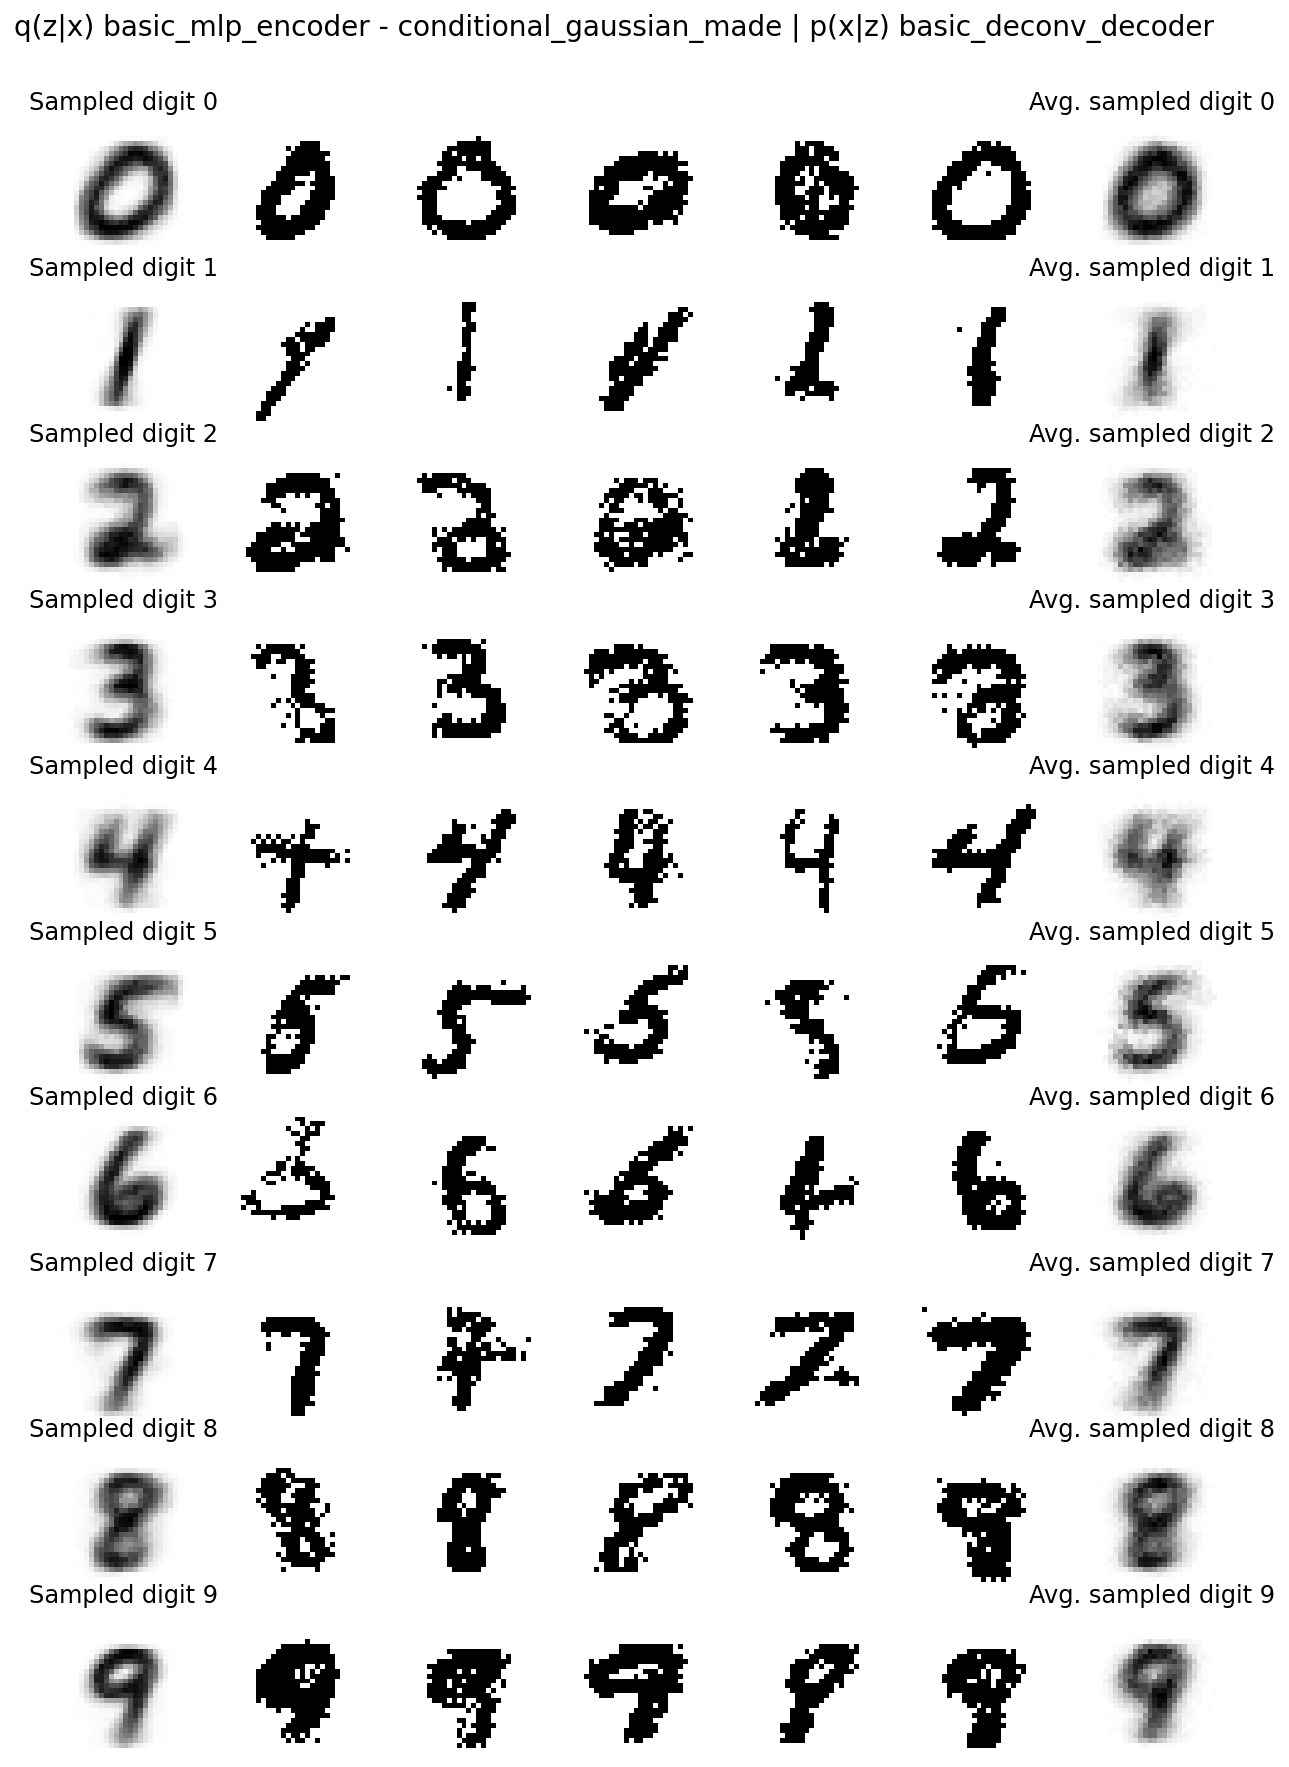

best val loss 83.59


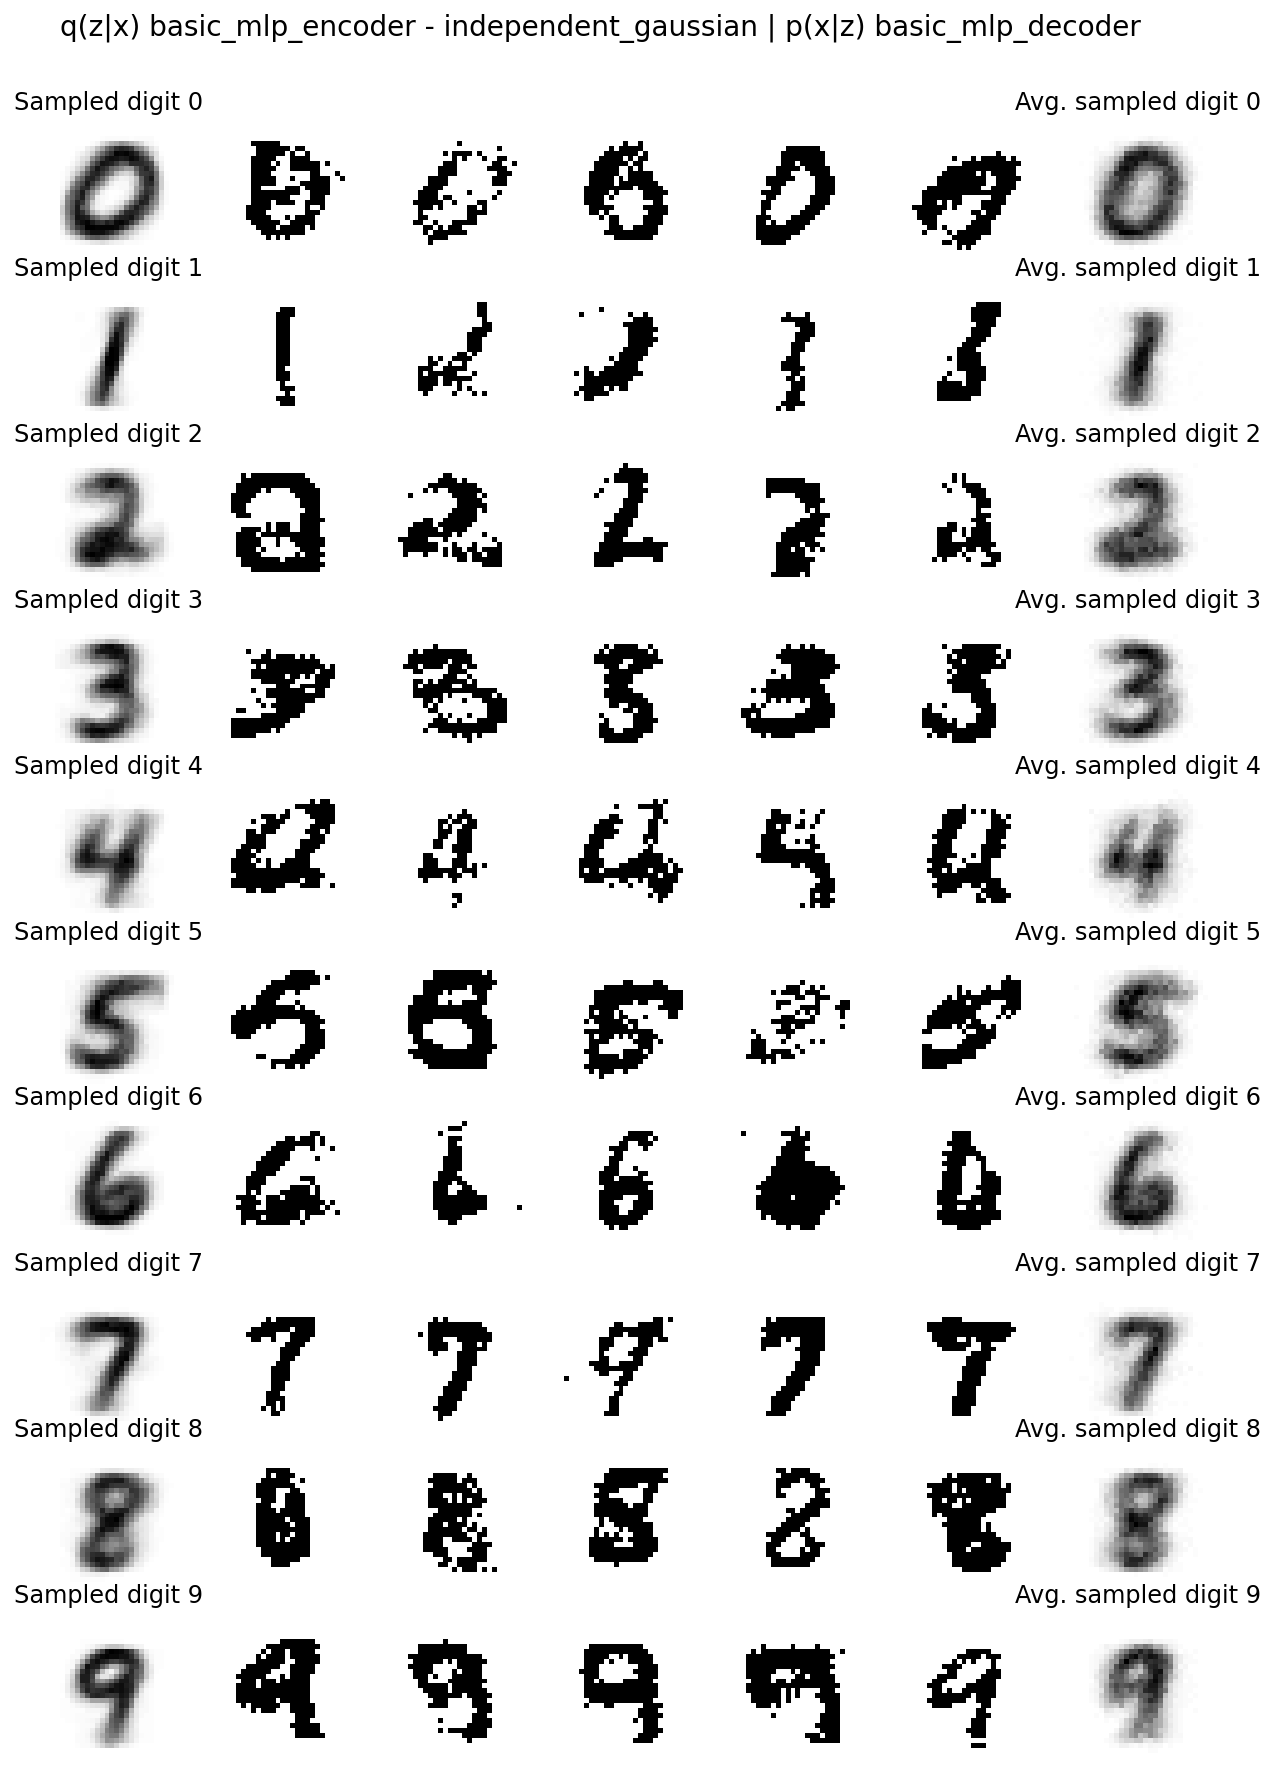

best val loss 81.19


KeyboardInterrupt: 

In [4]:
# PLOT SAVING
plot_dir = "prior-plots"
os.makedirs(plot_dir, exist_ok=True)

# KNN
knn_model = pickle.load(open('knnclassifier.pickle', 'rb'))

# DATA
data_X, data_y = get_n_data_samples_x_y(image_dataset_name="bmnist", N_samples=1000)

# MAKE PRIOR GRID PLOTS
for C_N in range(12):
    checkpoint_path = f"{checkpoint_dir}/{checkpoint_dict[C_N]}"
    
    vae_model = load_checkpoint_model_for_eval(checkpoint_path)
    
    clean_name = checkpoint_dict[C_N].split("- 2021")[0]
    build_prior_analysis_grid(vae_model=vae_model, plot_name=clean_name, plot_dir=plot_dir,
                              knn_classifier=knn_model, n_generative_samples=500, 
                              data_X=data_X, data_y=data_y, show_n_samples=5, avg_n_data_samples=60)